### PCA (Dimensionality Reduction)

### 🌟 What is Dimensionality Reduction?

In ML, features = columns (like Age, Income, Runs, Strike Rate).

Sometimes we have too many features → this makes models slower, harder to visualize, and sometimes less accurate (noise, redundancy).

Dimensionality reduction means:
👉 Keep the most important information while reducing the number of features.

🏏 IPL Cricket Example

Imagine we are analyzing IPL players with these features:

Matches Played

Runs Scored

Strike Rate

Batting Average

Boundaries %

Balls Faced

👉 Many of these are related:

Runs Scored, Balls Faced, Strike Rate are all connected.

We don’t need to keep all of them separately — they overlap in meaning.

PCA can combine related features into fewer “summary features.”
For example:

New Feature 1 (PC1): Overall batting performance (mix of Runs, Average, Strike Rate).

New Feature 2 (PC2): Aggressiveness (mix of Boundaries %, Strike Rate).

Now instead of 6 features, we only keep 2, which still explain most of the information.

🎯 Why is this useful?

Makes data easier to visualize (2D or 3D).

Removes noise/redundancy.

Speeds up training.

Helps models generalize better.

✅ In short:
PCA = “Take many correlated cricket stats → create fewer, smarter summary stats → keep most of the information.”

### Topic 2: Eigenvalues & Eigenvectors basics

### 🌟 Imagine a simple IPL example

We are studying batsmen with two features:

Runs scored

Balls faced

When we plot them on a graph:

Players who face more balls usually also score more runs.

So most points fall roughly along a diagonal line.

### 🔹 Step 1: Eigenvector (Direction)

An eigenvector is simply the main direction in which data spreads.

In our example, that diagonal line (Runs ↑ with Balls ↑) is the main direction.

👉 Think of it as a new x-axis tilted along the data.

### 🔹 Step 2: Eigenvalue (Importance)

An eigenvalue tells how much data variation is captured along that direction.

If most points are spread along that diagonal → eigenvalue is large.

If points are not very spread in the perpendicular direction → eigenvalue is small.

👉 Bigger eigenvalue = “This direction explains more about the data.”

### 🏏 IPL Analogy:

Imagine you want to describe a batsman using just one number instead of two (Runs & Balls).

Instead of keeping both features, you use the diagonal line score (overall batting volume).

This new axis is the eigenvector.

The importance of this new axis (how well it summarizes data) is the eigenvalue.

### 🎯 Super Simple Takeaway:

Eigenvector = the new tilted axis (direction).

Eigenvalue = how useful that axis is.

PCA picks the most useful axes (highest eigenvalues) and drops the less useful ones.

Original Dataset:
    Runs  Balls  StrikeRate  Average  Boundaries%
0   450    380         118       40           55
1   620    510         121       42           58
2   310    280         111       35           50
3   710    600         118       45           60
4   500    420         119       39           57
5   330    300         110       33           52

PCA Transformed Data (2D):
 [[-0.00702115  0.57147614]
 [ 1.97813447  0.33517597]
 [-2.775362   -0.12915046]
 [ 2.92856368 -0.85968166]
 [ 0.56579304  0.52865721]
 [-2.69010803 -0.4464772 ]]

Explained Variance Ratio: [0.92496626 0.05578269]


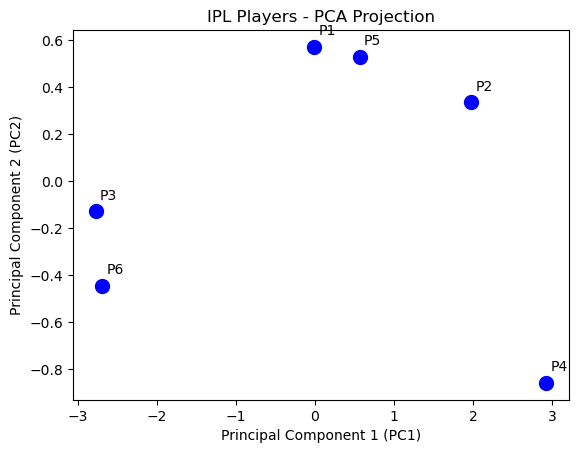

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Create IPL-style dataset (Runs, Balls, StrikeRate, Avg, Boundaries%)
data = {
    "Runs": [450, 620, 310, 710, 500, 330],
    "Balls": [380, 510, 280, 600, 420, 300],
    "StrikeRate": [118, 121, 111, 118, 119, 110],
    "Average": [40, 42, 35, 45, 39, 33],
    "Boundaries%": [55, 58, 50, 60, 57, 52]
}
df = pd.DataFrame(data)
print("Original Dataset:\n", df)

# Step 2: Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nPCA Transformed Data (2D):\n", X_pca)

# Step 4: Explained Variance (importance of each component)
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)

# Step 5: Plot PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="blue", s=100)
for i, player in enumerate(df.index):
    plt.text(X_pca[i, 0]+0.05, X_pca[i, 1]+0.05, f"P{player+1}")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("IPL Players - PCA Projection")
plt.show()
